In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/Anarchy/Documents/Data_Science/Fuel Efficiency/auto-mpg.csv")
df.head(20)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150,NaN,NaN,NaN,NaN,ford pinto
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# we need to understand why the values in horsepower column are object type
df['horsepower'].unique() 

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [6]:
# Count the number of '?' values in the 'horsepower' column
count_question_marks = (df['horsepower'] == '?').sum()
count_question_marks

6

In [7]:
# Drop rows where 'horsepower' has the value '?'
df = df[df['horsepower'] != '?']

# Ensure 'horsepower' is not object type and convert it to int64
df['horsepower'] = pd.to_numeric(df['horsepower']).astype('int64')

# Reset the index after dropping rows
df.reset_index(drop=True, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


In [8]:
# Count the number of '?' values in the 'horsepower' column
count_question_marks = (df['horsepower'] == '?').sum()
count_question_marks

0

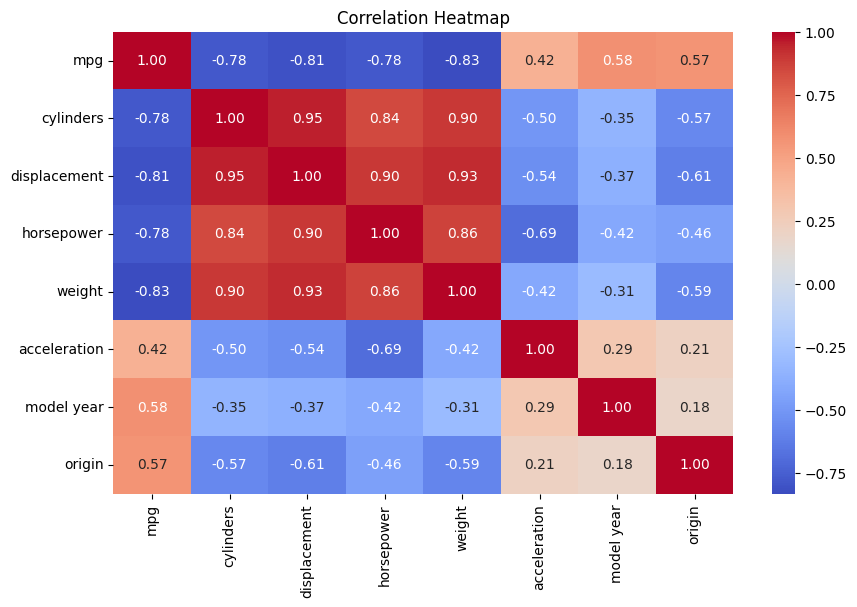

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar =True)

plt.title("Correlation Heatmap")
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
features = df.drop(['mpg', 'car name'], axis=1)
target = df['mpg'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=22)
X_train.shape, X_val.shape

((313, 7), (79, 7))

In [16]:
AUTO = tf.data.experimental.AUTOTUNE

train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .batch(32)
    .prefetch(AUTO)
)

val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .batch(32)
    .prefetch(AUTO)
)

In [17]:
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=[7]),
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='relu')
])

In [18]:
model.compile(
    loss='mae',
    optimizer='adam',
    metrics=['mape']
)

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 256)               2048      
                                                                 
 batch_normalization_2 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 1)                

In [20]:
history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds)

Epoch 1/50


10/10 [==============================] - 1s 23ms/step - loss: 20.7958 - mape: 89.7941 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 18.2385 - mape: 80.9558 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 16.6655 - mape: 75.5217 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 15.2880 - mape: 70.7021 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 13.9870 - mape: 66.2281 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 12.9825 - mape: 62.6740 - val_loss: 22.4190 - val_mape: 100.0000
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 12.2187 - mape: 59.7753 - val_loss: 22.3862 - val_mape: 99.9043
Epoch 8/50
10/10 [==============================] - 

In [21]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,mape,val_loss,val_mape
0,20.795786,89.794052,22.418987,100.0
1,18.238478,80.955780,22.418987,100.0
2,16.665529,75.521652,22.418987,100.0
3,15.288037,70.702141,22.418987,100.0
4,13.987028,66.228134,22.418987,100.0


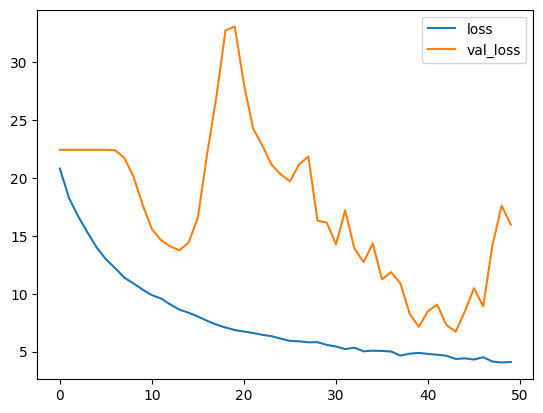

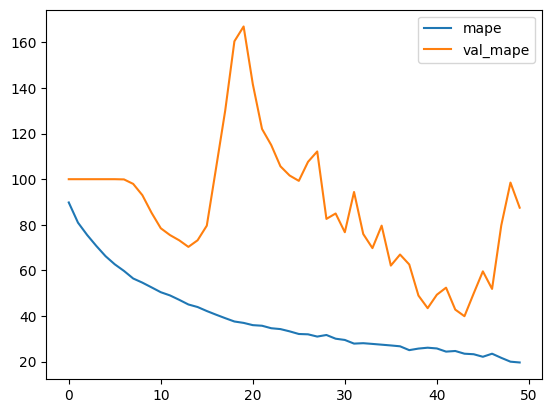

In [22]:
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['mape', 'val_mape']].plot()
plt.show()